In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import cdist, pdist
import plotly.express as px
import plotly.graph_objects as go
from itertools import product

In [ ]:
#importing the dataset
my_df=pd.read_csv("/content/Country-data.csv")
my_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
my_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
my_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


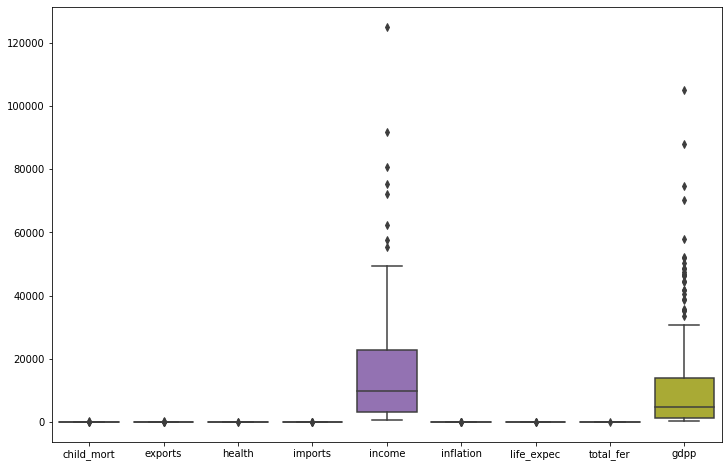

In [ ]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=my_df)
plt.show()

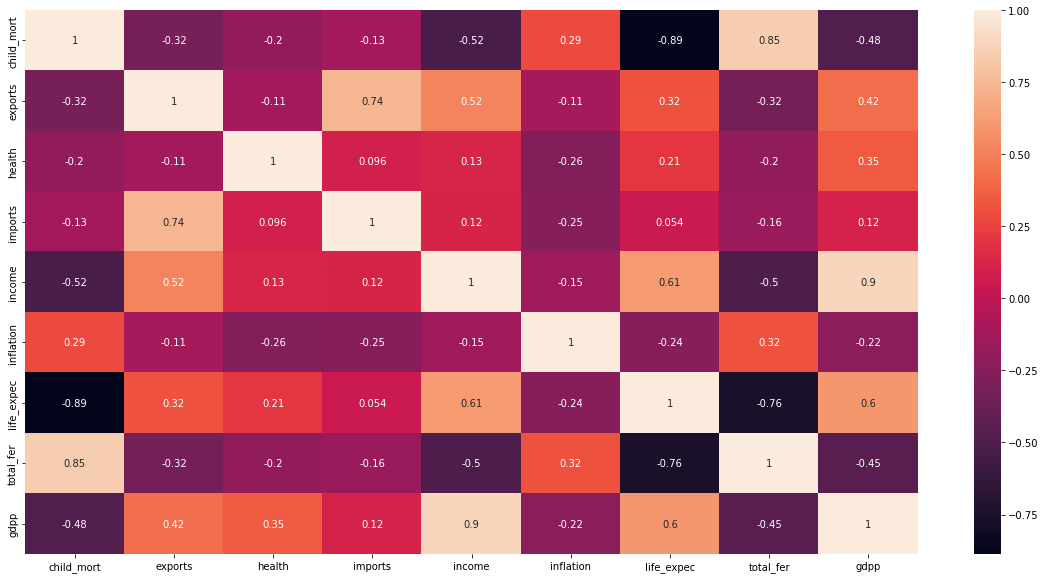

In [ ]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(my_df.corr(),annot = True)
plt.show()

In [ ]:
# in standardisation, all features will be transformed to have the properties of standard normal distribution with mean=0 and standard deviation=1
#
# columns argument ==> we'll use this later to create a new dataframe with the rescaled data
dataset = my_df.drop(['country'], axis =1)
columns = dataset.columns

# the scaler to use will be
scaler = StandardScaler()

# 'scaler' is for the rescaling technique, 'fit' function is to find the x_min and the x_max, 'transform' function applies formula to all elements of data
rescaled_dataset_standard = scaler.fit_transform(dataset)
rescaled_dataset_standard

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

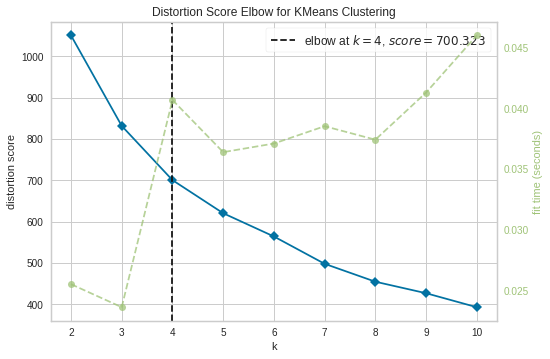

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters to make with 2 component
Elb = KElbowVisualizer(KMeans(), k=10)
Elb.fit(rescaled_dataset_standard)
Elb.show()


In [ ]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(rescaled_dataset_standard)
    sse_.append([k, silhouette_score(rescaled_dataset_standard, kmeans.labels_)])

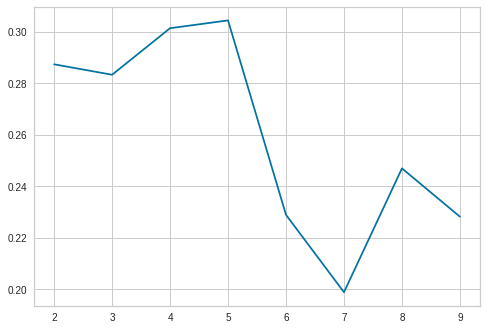

In [ ]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()



In [ ]:
km_model = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
km_model.fit(rescaled_dataset_standard)

KMeans(max_iter=50, n_clusters=4, random_state=50)

In [ ]:
kmeans_data= pd.concat([my_df,pd.DataFrame({'cluster':km_model.labels_})],axis=1)
kmeans_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [ ]:
kmeans_data['cluster'].value_counts()

2    88
1    46
0    30
3     3
Name: cluster, dtype: int64

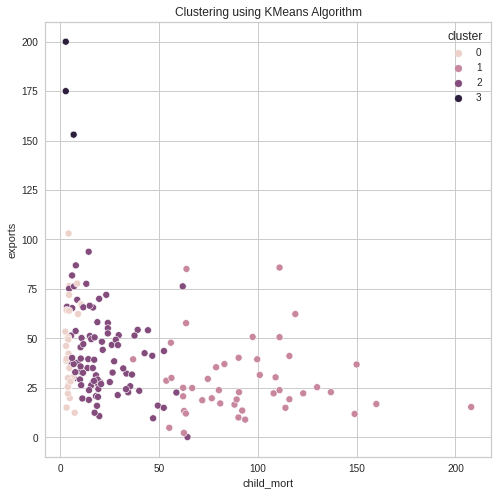

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="child_mort",y="exports",hue="cluster",data=kmeans_data)
plt.title("Clustering using KMeans Algorithm")
plt.show()

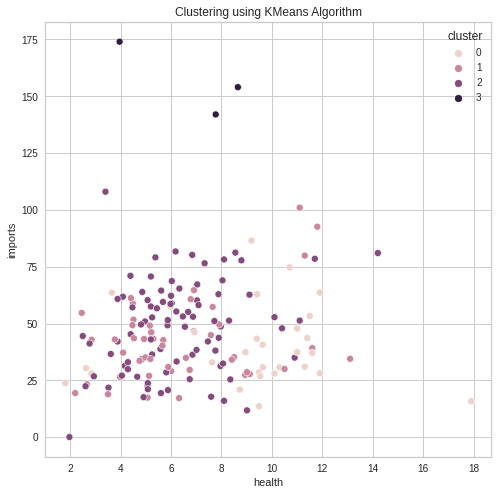

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="health",y="imports",hue="cluster",data=kmeans_data)
plt.title("Clustering using KMeans Algorithm")
plt.show()

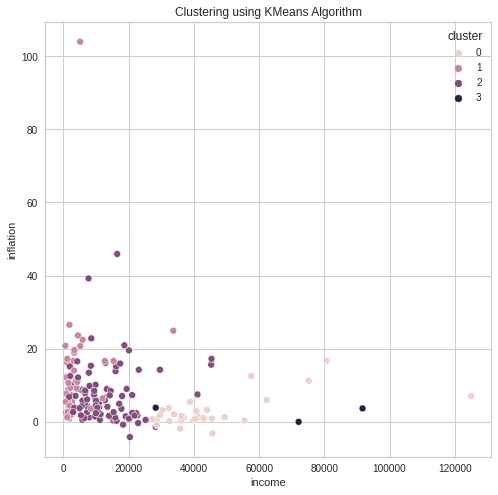

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="income",y="inflation",hue="cluster",data=kmeans_data)
plt.title("Clustering using KMeans Algorithm")
plt.show()

In [ ]:
#GMM algorithm
sse_ = []
for k in range(2, 10):
    gmm_model = GaussianMixture(n_components=k, random_state = 50)
    sse_.append([k, silhouette_score(rescaled_dataset_standard, gmm_model.fit_predict(rescaled_dataset_standard))])

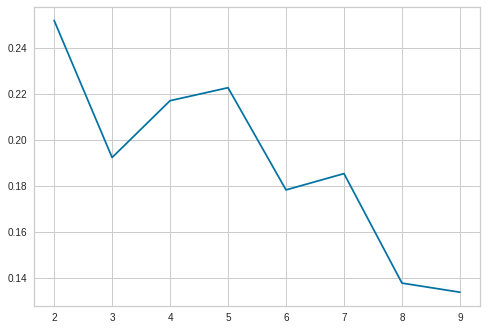

In [ ]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

In [ ]:
gmm_model = GaussianMixture(n_components=5, random_state = 50)


In [ ]:
gmm_data= pd.concat([my_df,pd.DataFrame({'cluster':gmm_model.fit_predict(rescaled_dataset_standard)})],axis=1)
gmm_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


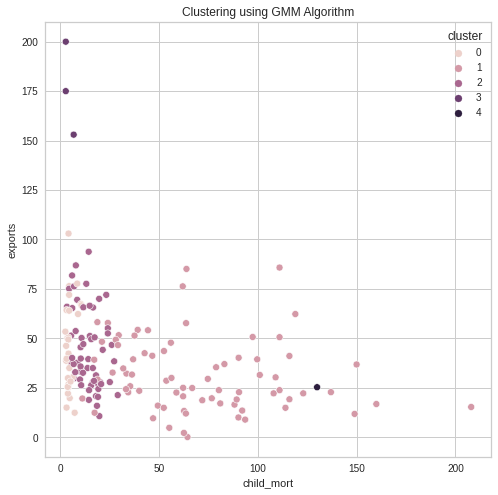

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="child_mort",y="exports",hue="cluster",data=gmm_data)
plt.title("Clustering using GMM Algorithm")
plt.show()

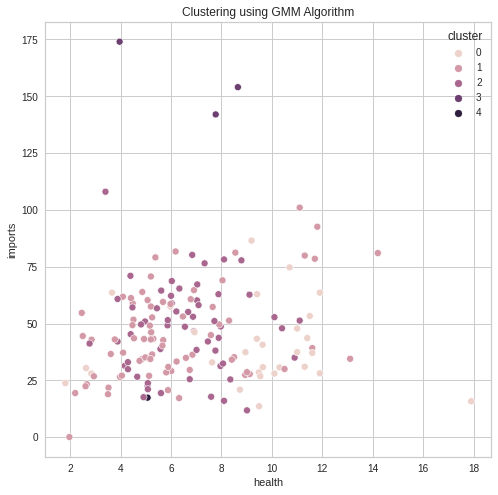

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="health",y="imports",hue="cluster",data=gmm_data)
plt.title("Clustering using GMM Algorithm")
plt.show()

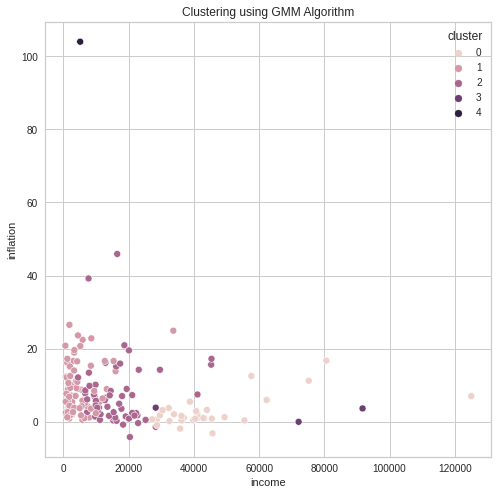

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="income",y="inflation",hue="cluster",data=gmm_data)
plt.title("Clustering using GMM Algorithm")
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering
sse_ = []
for k in range(2, 10):
    spectral_model = SpectralClustering(n_clusters=k, affinity='nearest_neighbors',
                          assign_labels='kmeans')
    sse_.append([k, silhouette_score(rescaled_dataset_standard, spectral_model.fit_predict(rescaled_dataset_standard))])

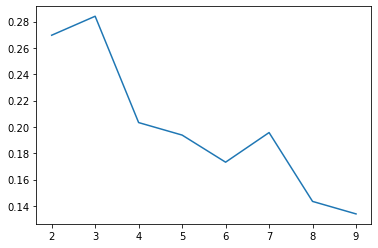

In [ ]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

In [ ]:
spectral_model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                          assign_labels='kmeans')
spectral_data= pd.concat([my_df,pd.DataFrame({'cluster':spectral_model.fit_predict(rescaled_dataset_standard)})],axis=1)
spectral_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


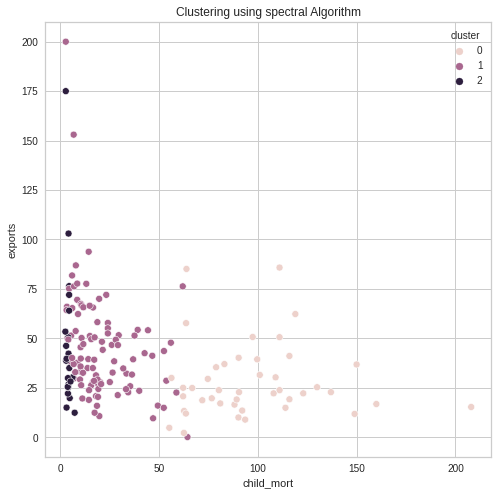

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="child_mort",y="exports",hue="cluster",data=spectral_data)
plt.title("Clustering using spectral Algorithm")
plt.show()

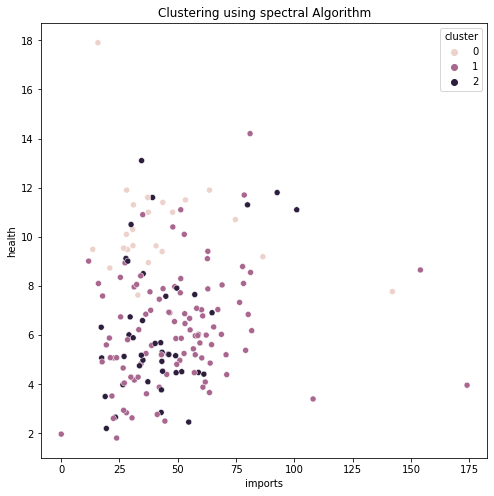

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="imports",y="health",hue="cluster",data=spectral_data)
plt.title("Clustering using spectral Algorithm")
plt.show()

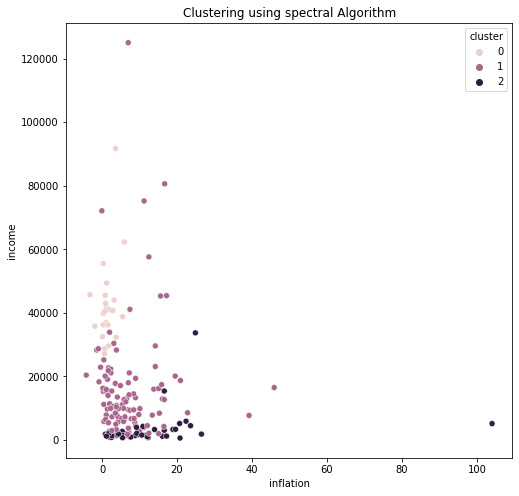

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="inflation",y="income",hue="cluster",data=spectral_data)
plt.title("Clustering using spectral Algorithm")
plt.show()

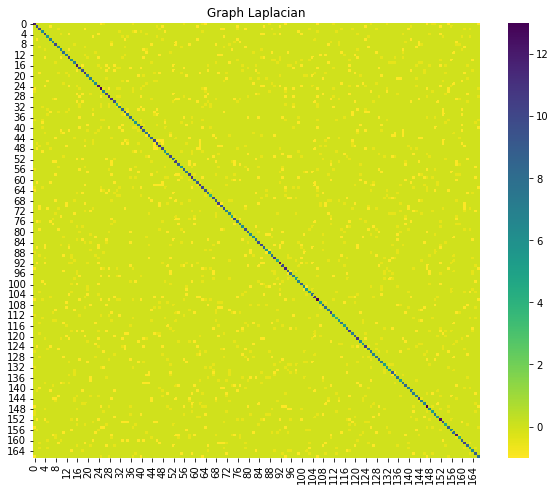

In [ ]:
ُfrom sklearn.neighbors import kneighbors_graph
from scipy import sparse

def generate_graph_laplacian(df, nn):
    """Generate graph Laplacian from data."""
    # Adjacency Matrix.
    connectivity = kneighbors_graph(X=df, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    # Graph Laplacian.
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()
    return graph_laplacian

graph_laplacian = generate_graph_laplacian(df=rescaled_dataset_standard, nn=8)

# Plot the graph Laplacian as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian');



In [ ]:
from scipy import linalg

eigenvals, eigenvcts = linalg.eig(graph_laplacian)



In [ ]:
np.unique(np.imag(eigenvals))


array([0.])

In [ ]:
# We project onto the real numbers.
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project
    them onto the real numbers.
    """
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)


In [ ]:
eigenvcts_norms = np.apply_along_axis(
  lambda v: np.linalg.norm(v, ord=2),
  axis=0,
  arr=eigenvcts
)

print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))



Min Norm: 0.9999999999999998
Max Norm: 1.0000000000000002


In [ ]:
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]



[Text(0, 0.5, '$\\lambda$'),
 Text(0.5, 0, 'index'),
 Text(0.5, 1.0, 'Sorted Eigenvalues Graph Laplacian')]

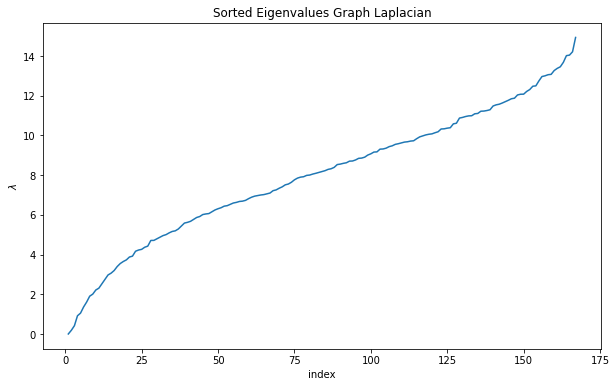

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$')

In [ ]:
sns_c = sns.color_palette(palette='deep')

[Text(0, 0.5, '$\\lambda$'),
 Text(0.5, 0, 'index'),
 Text(0.5, 1.0, 'Sorted Eigenvalues Graph Laplacian (First 10)')]

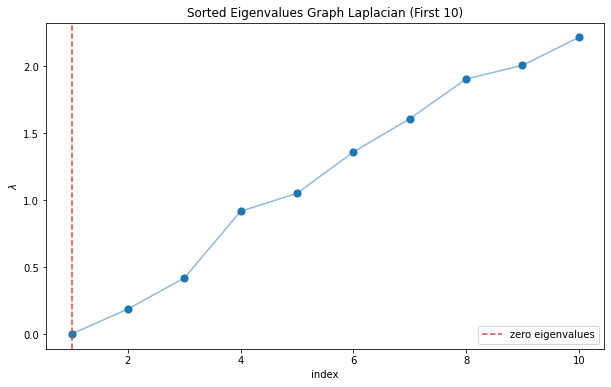

In [ ]:
index_lim = 10

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], alpha=0.5, ax=ax)
ax.axvline(x=1, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$')

In [ ]:
zero_eigenvals_index = np.argwhere(abs(eigenvals) < 0.75)
eigenvals[zero_eigenvals_index]



array([[-1.77635684e-15],
       [ 1.86566639e-01],
       [ 4.17592800e-01]])

In [ ]:
proj_df = pd.DataFrame(eigenvcts[:, zero_eigenvals_index.squeeze()])
proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
proj_df.head()



,v_0,v_1,v_2
0,-0.077382,0.093546,-0.107016
1,-0.077382,0.003976,0.082722
2,-0.077382,0.017033,0.057099
3,-0.077382,0.090588,-0.095974
4,-0.077382,-0.020805,0.081357


In [ ]:
def project_and_transpose(eigenvals, eigenvcts, num_ev):
    """Select the eigenvectors corresponding to the first
    (sorted) num_ev eigenvalues as columns in a data frame.
    """
    eigenvals_sorted_indices = np.argsort(eigenvals)
    indices = eigenvals_sorted_indices[: num_ev]

    proj_df = pd.DataFrame(eigenvcts[:, indices.squeeze()])
    proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
    return proj_df



In [ ]:
inertias = []

k_candidates = range(1, 6)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(proj_df)
    inertias.append(k_means.inertia_)



[Text(0, 0.5, 'inertia'), Text(0.5, 0, 'k'), Text(0.5, 1.0, 'Inertia K-Means')]

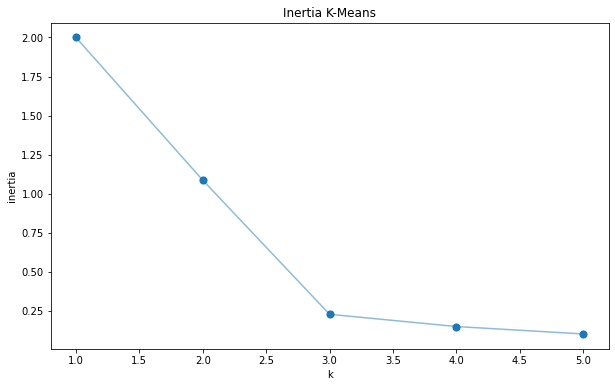

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k')



In [ ]:
def run_k_means(df, n_clusters):
    """K-means clustering."""
    k_means = KMeans(random_state=25, n_clusters=n_clusters)
    k_means.fit(df)
    cluster = k_means.predict(df)
    return cluster

cluster = run_k_means(proj_df, n_clusters=3)



In [ ]:
sse_ = []
for k in range(2, 10):
    sse_.append([k, silhouette_score(proj_df, run_k_means(proj_df,k))])

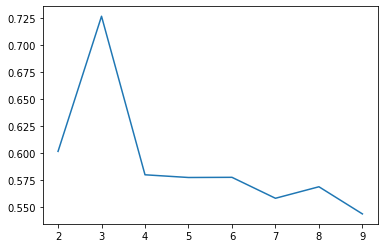

In [ ]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

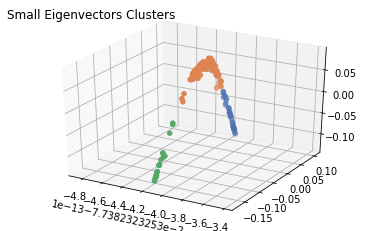

In [ ]:


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    xs=proj_df['v_0'],
    ys=proj_df['v_1'],
    zs=proj_df['v_2'],
    c=[{0: sns_c[0], 1: sns_c[1], 2: sns_c[2]}.get(c) for c in cluster]
)
ax.set_title('Small Eigenvectors Clusters', x=0.2);



In [ ]:
cluster

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

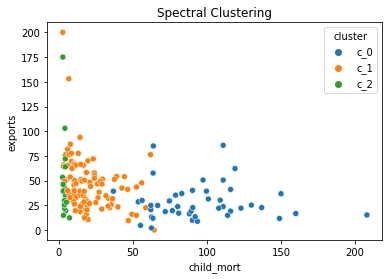

In [ ]:
spectral_scratch2_data = my_df.copy()
spectral_scratch2_data['cluster'] = ['c_' + str(c) for c in cluster]

fig, ax = plt.subplots()
sns.scatterplot(x='child_mort', y='exports', data=spectral_scratch2_data, hue='cluster', ax=ax)
ax.set(title='Spectral Clustering');

[Text(0.5, 1.0, 'Spectral Clustering')]

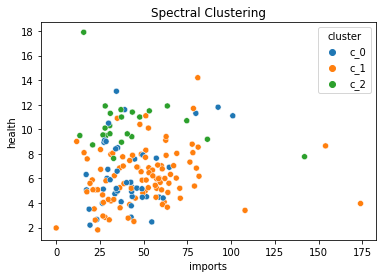

In [ ]:
spectral_scratch2_data = my_df.copy()
spectral_scratch2_data['cluster'] = ['c_' + str(c) for c in cluster]

fig, ax = plt.subplots()
sns.scatterplot(x='imports', y='health', data=spectral_scratch2_data, hue='cluster', ax=ax)
ax.set(title='Spectral Clustering')

[Text(0.5, 1.0, 'Spectral Clustering')]

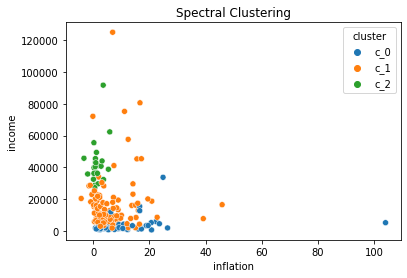

In [ ]:
spectral_scratch2_data = my_df.copy()
spectral_scratch2_data['cluster'] = ['c_' + str(c) for c in cluster]

fig, ax = plt.subplots()
sns.scatterplot(x='inflation', y='income', data=spectral_scratch2_data, hue='cluster', ax=ax)
ax.set(title='Spectral Clustering')

In [ ]:
pca = PCA(svd_solver='randomized', random_state=42)


# fiting PCA on the dataset
pca.fit(rescaled_dataset_standard)



PCA(random_state=42, svd_solver='randomized')

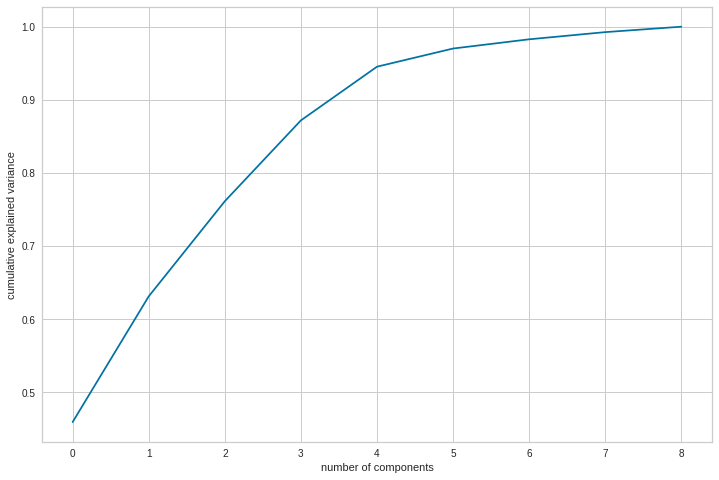

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [ ]:
df_pca = pca_final.fit_transform(rescaled_dataset_standard)
df_pca.shape



(167, 5)

In [ ]:
pc = np.transpose(df_pca)

In [ ]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})



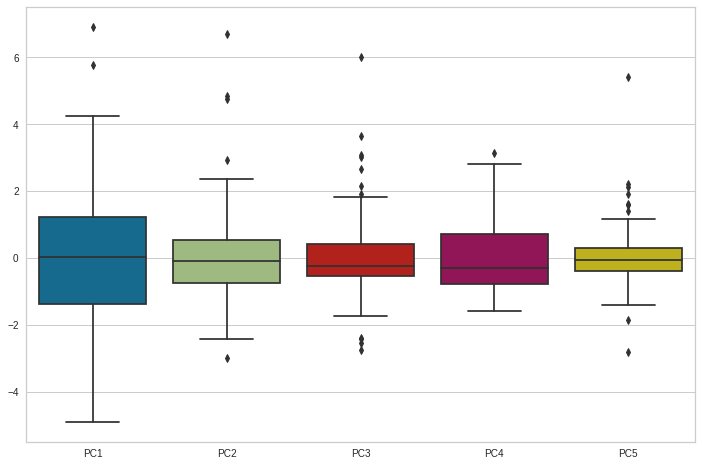

In [ ]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()

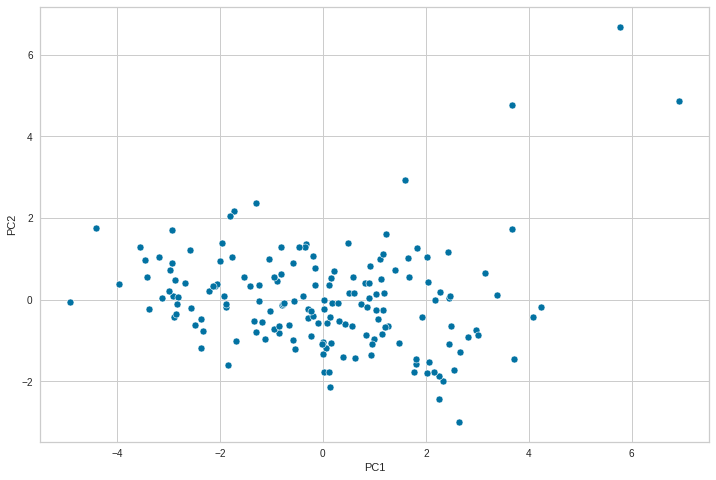

In [ ]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()



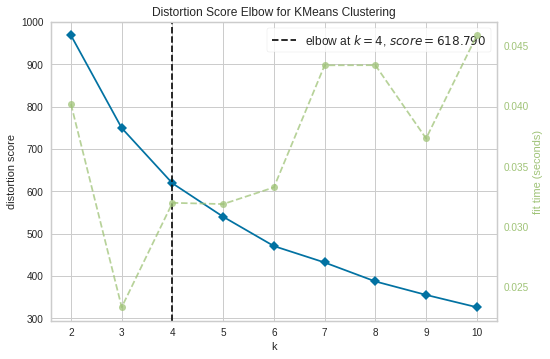

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make with 2 component
Elb = KElbowVisualizer(KMeans(), k=10)
Elb.fit(pcs_df2)
Elb.show()


In [ ]:
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pcs_df2)
    sse_.append([k, silhouette_score(pcs_df2, kmeans.labels_)])

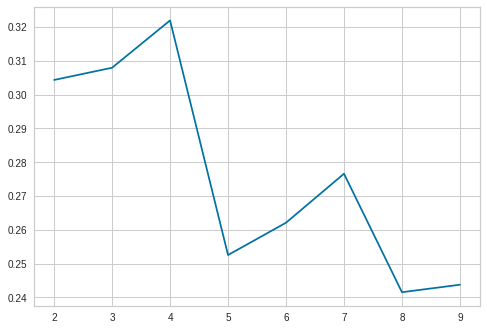

In [ ]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()


In [ ]:
km_model_pca = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
km_model_pca.fit(pcs_df2)

KMeans(max_iter=50, n_clusters=4, random_state=50)

In [ ]:
kmeans_data_pca= pd.concat([my_df,pd.DataFrame({'cluster':km_model_pca.labels_})],axis=1)
kmeans_data_pca

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


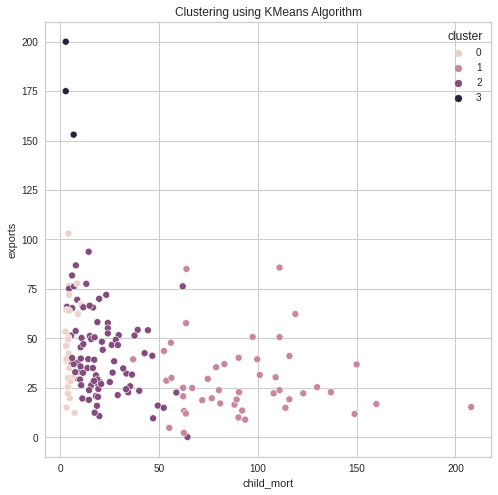

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="child_mort",y="exports",hue="cluster",data=kmeans_data_pca)
plt.title("Clustering using KMeans Algorithm")
plt.show()

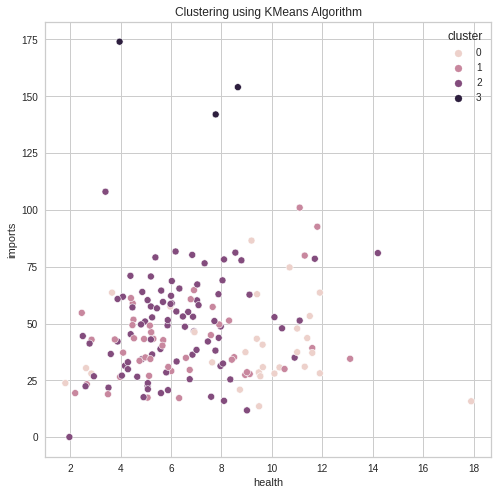

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="health",y="imports",hue="cluster",data=kmeans_data_pca)
plt.title("Clustering using KMeans Algorithm")
plt.show()

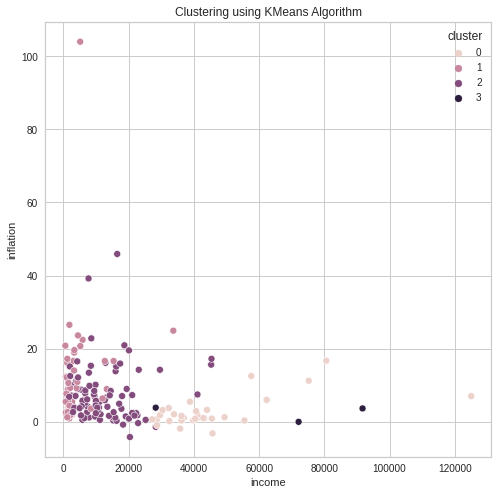

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="income",y="inflation",hue="cluster",data=kmeans_data_pca)
plt.title("Clustering using KMeans Algorithm")
plt.show()

In [ ]:
#GMM algorithm with pca
sse_ = []
for k in range(2, 10):
    gmm_model = GaussianMixture(n_components=k, random_state = 50)
    sse_.append([k, silhouette_score(pcs_df2, gmm_model.fit_predict(pcs_df2))])

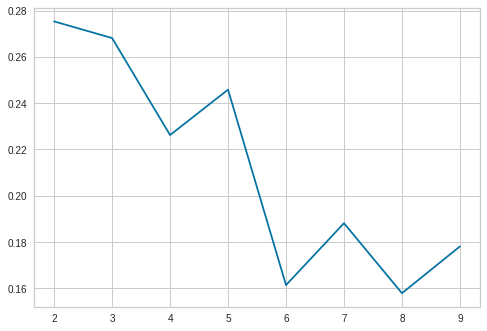

In [ ]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

In [ ]:
gmm_model_pca = GaussianMixture(n_components=3, random_state = 50)


In [ ]:
gmm_data_pca= pd.concat([my_df,pd.DataFrame({'cluster':gmm_model_pca.fit_predict(pcs_df2)})],axis=1)
gmm_data_pca

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


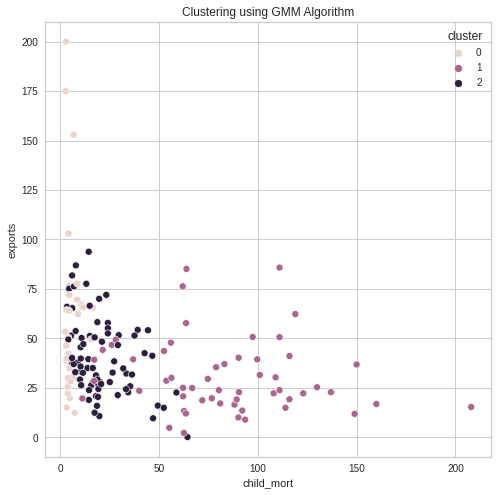

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="child_mort",y="exports",hue="cluster",data=gmm_data_pca)
plt.title("Clustering using GMM Algorithm")
plt.show()

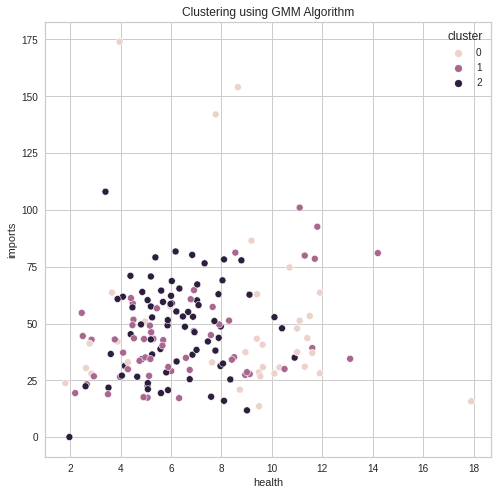

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="health",y="imports",hue="cluster",data=gmm_data_pca)
plt.title("Clustering using GMM Algorithm")
plt.show()

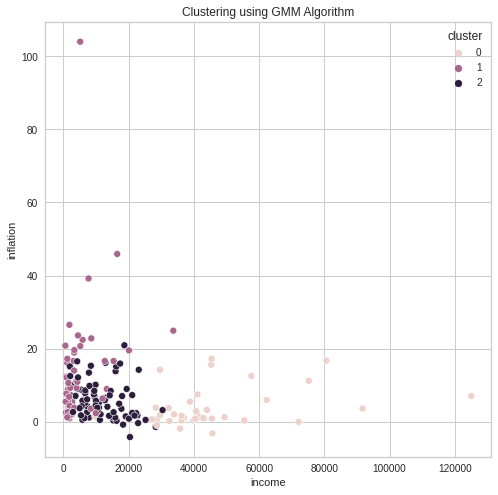

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="income",y="inflation",hue="cluster",data=gmm_data_pca)
plt.title("Clustering using GMM Algorithm")
plt.show()

In [ ]:
sse_ = []
for k in range(2, 10):
    spectral_model = SpectralClustering(n_clusters=k, affinity='nearest_neighbors',
                          assign_labels='kmeans')
    sse_.append([k, silhouette_score(pcs_df2, spectral_model.fit_predict(pcs_df2))])

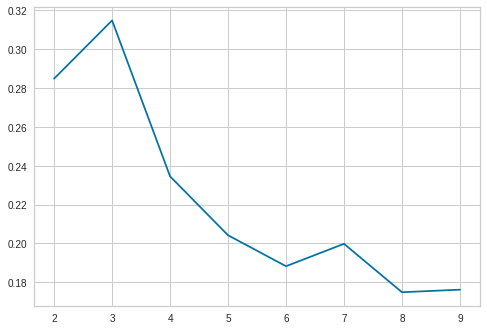

In [ ]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

In [ ]:
spectral_model_pca = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                          assign_labels='kmeans')
spectral_data_pca= pd.concat([my_df,pd.DataFrame({'cluster':spectral_model_pca.fit_predict(pcs_df2)})],axis=1)
spectral_data_pca

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


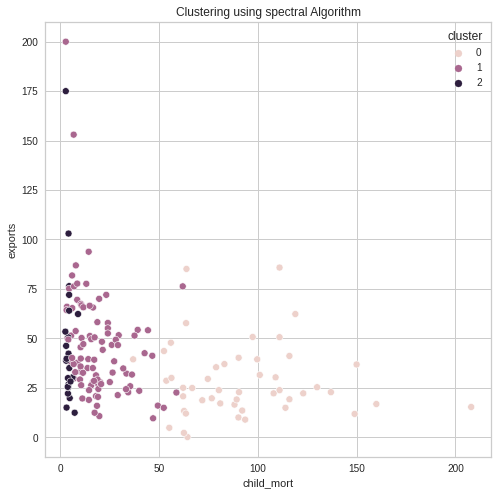

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="child_mort",y="exports",hue="cluster",data=spectral_data_pca)
plt.title("Clustering using spectral Algorithm")
plt.show()

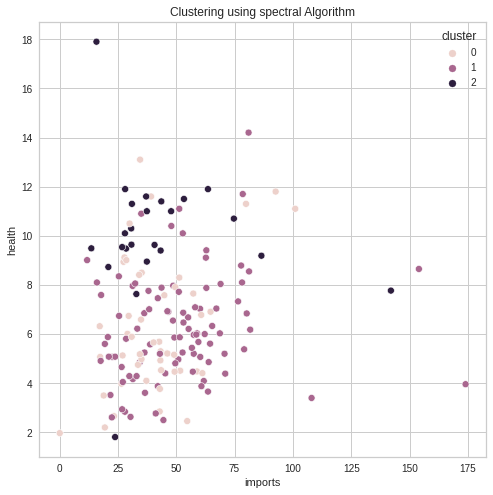

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="imports",y="health",hue="cluster",data=spectral_data_pca)
plt.title("Clustering using spectral Algorithm")
plt.show()

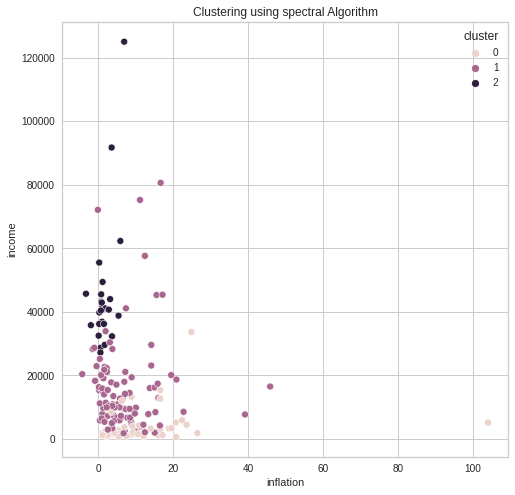

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="inflation",y="income",hue="cluster",data=spectral_data_pca)
plt.title("Clustering using spectral Algorithm")
plt.show()

In [ ]:
import scipy.io
shuffle_data = scipy.io.loadmat('/content/shuttle.mat')
shuffle_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Apr 26 18:16:23 2016',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 50,  21,  77, ...,  27,  48,  22],
        [ 53,   0,  82, ...,  29,  30,   2],
        [ 37,   0,  76, ...,  40,  48,   8],
        ...,
        [ 49,   0,  87, ...,  38,  41,   2],
        [ 80,   0,  84, ...,   4, 120, 116],
        [ 37,   0, 103, ...,  66,  85,  20]], dtype=int16),
 'y': array([[1],
        [0],
        [0],
        ...,
        [0],
        [1],
        [0]], dtype=uint8)}

In [ ]:
shuffle_data_X = shuffle_data['X']


In [ ]:
shuffle_data_X.shape


(49097, 9)

In [ ]:
kmeans_model_shuffle = KMeans(n_clusters=2, random_state = 42)

In [ ]:
predicted_y_kmeans = kmeans_model_shuffle.fit_predict(shuffle_data_X)
predicted_y_kmeans.shape

(49097,)

In [ ]:
shuffle_data_y = shuffle_data['y']

In [ ]:
from sklearn.metrics import f1_score
f1_score(shuffle_data_y, predicted_y_kmeans, average=None)

array([0.96289411, 0.00170503])

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(shuffle_data_y, predicted_y_kmeans))

Accuracy: 0.928


In [ ]:
spectral_model_shuffle = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')
predicted_y_spectral = spectral_model_shuffle.fit_predict(shuffle_data_X)

In [ ]:
f1_score(shuffle_data_y, predicted_y_spectral, average=None)

array([0.97240798, 0.41668546])

In [ ]:
print('Accuracy: %.3f' % accuracy_score(shuffle_data_y, predicted_y_spectral))

Accuracy: 0.947


In [ ]:
gmm_model_shuffle = GaussianMixture(n_components=2, random_state = 50)
predicted_y_gmm = gmm_model_shuffle.fit_predict(shuffle_data_X)

In [ ]:
f1_score(shuffle_data_y, predicted_y_gmm, average=None)

array([0.96289411, 0.00170503])

In [ ]:
print('Accuracy: %.3f' % accuracy_score(shuffle_data_y, predicted_y_gmm))

Accuracy: 0.928


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import preprocessing
import plotly.express as px
from sklearn.datasets import make_blobs
plt.style.use('dark_background')

In [ ]:
class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters # cluster number
        self.max_iterations = 100 # max iteration. don't want to run inf time
        self.num_examples, self.num_features = X.shape # num of examples, num of features
        self.plot_figure = True # plot figure

    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for k in range(self.K): # iterations of
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids

    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using euler distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters

    # new centroids
    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids

    # prediction
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred

    # plotinng scatter plot
    def plot_fig(self, X, y):
        fig = px.scatter(X[:, 0], X[:, 1], color=y)
        fig.show() # visualize

    # fit data
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X) # predict function
        if self.plot_figure: # if true
            self.plot_fig(X, y_pred) # plot function
        return y_pred



In [ ]:
dataset = pd.read_csv("/content/household_power_consumption.txt",
                      delimiter= ";",
                      low_memory= False)

In [ ]:
dataset = dataset.iloc[0:, 2:9].dropna()

In [ ]:
pca= PCA(n_components= 2).fit_transform(dataset)

In [ ]:
if __name__ == "__main__":
    np.random.seed(10)
    num_clusters = 5 # num of cluster
    Kmeans = KMeansClustering(pca, num_clusters)
    y_pred = Kmeans.fit(pca)

In [ ]:
silhouette_score(pca, y_pred)

In [ ]:
km_model = KMeans(n_clusters = 5, max_iter=50,random_state = 50)
km_model.fit(pca)

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter)

    def initialize(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape

        self.phi = np.full(shape=self.k, fill_value=1/self.k)
        self.weights = np.full( shape=self.shape, fill_value=1/self.k)

        random_row = np.random.randint(low=0, high=self.n, size=self.k)
        self.mu = [  X[row_index,:] for row_index in random_row ]
        self.sigma = [ np.cov(X.T) for _ in range(self.k) ]

    def e_step(self, X):
        # E-Step: update weights and phi holding mu and sigma constant
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis=0)

    def m_step(self, X):
        # M-Step: update mu and sigma holding phi and weights constant
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T,
                aweights=(weight/total_weight).flatten(),
                bias=True)

    def fit(self, X):
        self.initialize(X)

        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)

    def predict_proba(self, X):
        likelihood = np.zeros( (self.n, self.k) )
        for i in range(self.k):
            distribution = multivariate_normal(
                mean=self.mu[i],
                cov=self.sigma[i])
            likelihood[:,i] = distribution.pdf(X)

        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights

    def predict(self, X):
        weights = self.predict_proba(X)
        return np.argmax(weights, axis=1)

In [ ]:
np.random.seed(42)
gmm = GMM(k=3, max_iter=10)
gmm.fit(pca)